## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  13.440588   799.127980  0.196736  6.510356  1.646715
1  93.180305   509.630192  0.283736  3.794715  0.930693
2  17.561220  1305.427574  0.542280  5.171528  1.544784
3  11.868151  1220.471241  0.439903  2.824750  1.485205
4  92.581548  1632.610727  0.940893  5.544093  1.497624


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0355112	total: 57.2ms	remaining: 57.2s
1:	learn: 1.0279578	total: 57.8ms	remaining: 28.8s
2:	learn: 1.0195691	total: 58.3ms	remaining: 19.4s
3:	learn: 1.0087892	total: 58.8ms	remaining: 14.6s
4:	learn: 0.9994349	total: 59.3ms	remaining: 11.8s
5:	learn: 0.9893295	total: 59.7ms	remaining: 9.9s
6:	learn: 0.9802785	total: 60.3ms	remaining: 8.56s
7:	learn: 0.9697269	total: 60.8ms	remaining: 7.54s
8:	learn: 0.9620588	total: 61.5ms	remaining: 6.77s
9:	learn: 0.9540005	total: 61.9ms	remaining: 6.13s
10:	learn: 0.9442433	total: 62.3ms	remaining: 5.6s
11:	learn: 0.9349857	total: 62.8ms	remaining: 5.17s
12:	learn: 0.9279728	total: 63.3ms	remaining: 4.8s
13:	learn: 0.9181569	total: 63.7ms	remaining: 4.49s
14:	learn: 0.9090289	total: 64ms	remaining: 4.2s
15:	learn: 0.9012059	total: 64.8ms	remaining: 3.98s
16:	learn: 0.8921785	total: 65.3ms	remaining: 3.77s
17:	learn: 0.8848743	total: 65.8ms	remaining: 3.59s
18:	learn: 0.8769014	total: 66.3ms	remaining: 3.42

92:	learn: 0.4929084	total: 107ms	remaining: 1.04s
93:	learn: 0.4899902	total: 109ms	remaining: 1.05s
94:	learn: 0.4866987	total: 113ms	remaining: 1.08s
95:	learn: 0.4838677	total: 114ms	remaining: 1.07s
96:	learn: 0.4809439	total: 114ms	remaining: 1.06s
97:	learn: 0.4783009	total: 115ms	remaining: 1.06s
98:	learn: 0.4758664	total: 115ms	remaining: 1.05s
99:	learn: 0.4734531	total: 116ms	remaining: 1.04s
100:	learn: 0.4698995	total: 116ms	remaining: 1.03s
101:	learn: 0.4672384	total: 117ms	remaining: 1.03s
102:	learn: 0.4637640	total: 117ms	remaining: 1.02s
103:	learn: 0.4600273	total: 118ms	remaining: 1.01s
104:	learn: 0.4568197	total: 118ms	remaining: 1.01s
105:	learn: 0.4538536	total: 119ms	remaining: 1s
106:	learn: 0.4510441	total: 119ms	remaining: 996ms
107:	learn: 0.4482572	total: 120ms	remaining: 990ms
108:	learn: 0.4452063	total: 121ms	remaining: 985ms
109:	learn: 0.4435025	total: 121ms	remaining: 978ms
110:	learn: 0.4403977	total: 122ms	remaining: 973ms
111:	learn: 0.4378581	t

242:	learn: 0.2300945	total: 179ms	remaining: 558ms
243:	learn: 0.2293757	total: 180ms	remaining: 558ms
244:	learn: 0.2282670	total: 181ms	remaining: 557ms
245:	learn: 0.2275253	total: 181ms	remaining: 555ms
246:	learn: 0.2265515	total: 182ms	remaining: 554ms
247:	learn: 0.2257839	total: 182ms	remaining: 553ms
248:	learn: 0.2247471	total: 183ms	remaining: 551ms
249:	learn: 0.2243286	total: 183ms	remaining: 550ms
250:	learn: 0.2239075	total: 184ms	remaining: 548ms
251:	learn: 0.2235233	total: 184ms	remaining: 547ms
252:	learn: 0.2228024	total: 185ms	remaining: 545ms
253:	learn: 0.2217461	total: 185ms	remaining: 544ms
254:	learn: 0.2211686	total: 185ms	remaining: 542ms
255:	learn: 0.2206475	total: 186ms	remaining: 540ms
256:	learn: 0.2199378	total: 186ms	remaining: 539ms
257:	learn: 0.2184359	total: 187ms	remaining: 537ms
258:	learn: 0.2175887	total: 187ms	remaining: 535ms
259:	learn: 0.2171126	total: 187ms	remaining: 534ms
260:	learn: 0.2162106	total: 188ms	remaining: 532ms
261:	learn: 

481:	learn: 0.1010228	total: 280ms	remaining: 301ms
482:	learn: 0.1007325	total: 281ms	remaining: 301ms
483:	learn: 0.1005148	total: 282ms	remaining: 300ms
484:	learn: 0.1001077	total: 282ms	remaining: 299ms
485:	learn: 0.0998215	total: 282ms	remaining: 298ms
486:	learn: 0.0995624	total: 283ms	remaining: 298ms
487:	learn: 0.0991863	total: 283ms	remaining: 297ms
488:	learn: 0.0988102	total: 284ms	remaining: 296ms
489:	learn: 0.0986006	total: 284ms	remaining: 296ms
490:	learn: 0.0983491	total: 284ms	remaining: 295ms
491:	learn: 0.0980295	total: 285ms	remaining: 294ms
492:	learn: 0.0977559	total: 285ms	remaining: 293ms
493:	learn: 0.0974480	total: 285ms	remaining: 292ms
494:	learn: 0.0972034	total: 286ms	remaining: 291ms
495:	learn: 0.0968931	total: 286ms	remaining: 290ms
496:	learn: 0.0966689	total: 286ms	remaining: 289ms
497:	learn: 0.0963633	total: 286ms	remaining: 289ms
498:	learn: 0.0961001	total: 287ms	remaining: 288ms
499:	learn: 0.0958664	total: 287ms	remaining: 287ms
500:	learn: 

696:	learn: 0.0541032	total: 356ms	remaining: 155ms
697:	learn: 0.0539209	total: 357ms	remaining: 154ms
698:	learn: 0.0537419	total: 358ms	remaining: 154ms
699:	learn: 0.0535556	total: 358ms	remaining: 153ms
700:	learn: 0.0533705	total: 358ms	remaining: 153ms
701:	learn: 0.0531582	total: 359ms	remaining: 152ms
702:	learn: 0.0529781	total: 359ms	remaining: 152ms
703:	learn: 0.0528018	total: 359ms	remaining: 151ms
704:	learn: 0.0526260	total: 359ms	remaining: 150ms
705:	learn: 0.0524534	total: 360ms	remaining: 150ms
706:	learn: 0.0522818	total: 360ms	remaining: 149ms
707:	learn: 0.0521157	total: 361ms	remaining: 149ms
708:	learn: 0.0519189	total: 361ms	remaining: 148ms
709:	learn: 0.0517520	total: 361ms	remaining: 148ms
710:	learn: 0.0515209	total: 362ms	remaining: 147ms
711:	learn: 0.0512940	total: 362ms	remaining: 146ms
712:	learn: 0.0510712	total: 362ms	remaining: 146ms
713:	learn: 0.0508525	total: 363ms	remaining: 145ms
714:	learn: 0.0506095	total: 363ms	remaining: 145ms
715:	learn: 

978:	learn: 0.0235871	total: 457ms	remaining: 9.8ms
979:	learn: 0.0235067	total: 457ms	remaining: 9.33ms
980:	learn: 0.0234278	total: 458ms	remaining: 8.86ms
981:	learn: 0.0233762	total: 458ms	remaining: 8.39ms
982:	learn: 0.0232988	total: 458ms	remaining: 7.93ms
983:	learn: 0.0232555	total: 459ms	remaining: 7.46ms
984:	learn: 0.0231982	total: 459ms	remaining: 7ms
985:	learn: 0.0231225	total: 460ms	remaining: 6.53ms
986:	learn: 0.0230333	total: 460ms	remaining: 6.06ms
987:	learn: 0.0229591	total: 461ms	remaining: 5.59ms
988:	learn: 0.0229175	total: 461ms	remaining: 5.13ms
989:	learn: 0.0228957	total: 461ms	remaining: 4.66ms
990:	learn: 0.0228383	total: 461ms	remaining: 4.19ms
991:	learn: 0.0227960	total: 462ms	remaining: 3.72ms
992:	learn: 0.0227354	total: 462ms	remaining: 3.26ms
993:	learn: 0.0226938	total: 463ms	remaining: 2.79ms
994:	learn: 0.0226384	total: 463ms	remaining: 2.33ms
995:	learn: 0.0226173	total: 463ms	remaining: 1.86ms
996:	learn: 0.0225965	total: 464ms	remaining: 1.4m

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

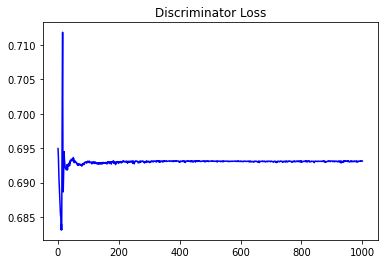

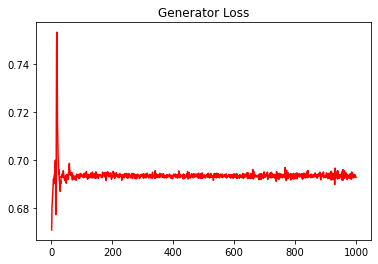

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.21035593301452676


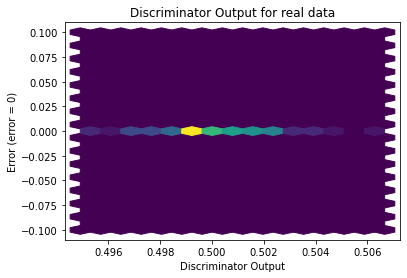

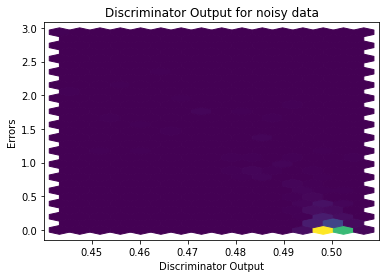

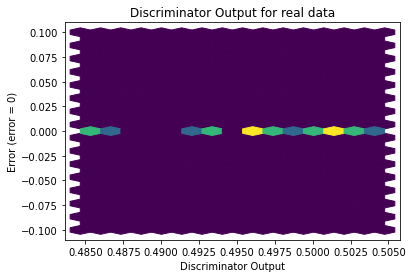

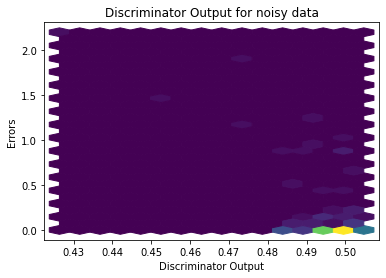

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


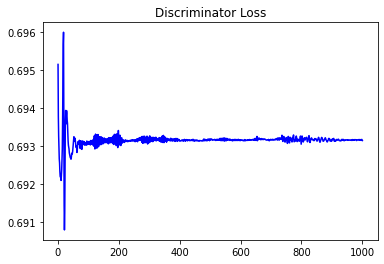

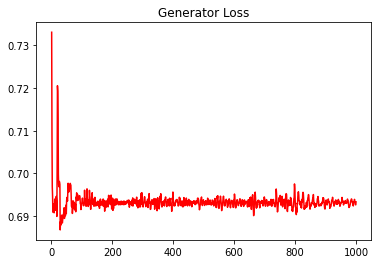

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1922884809767805


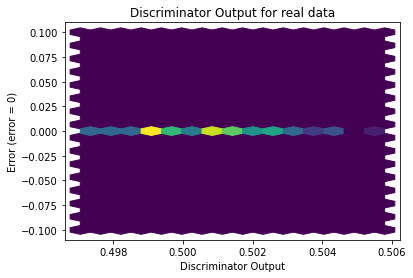

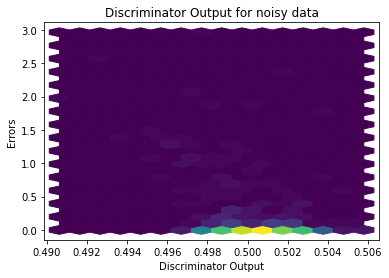

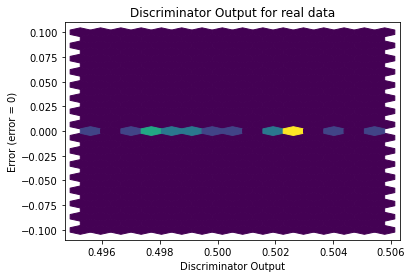

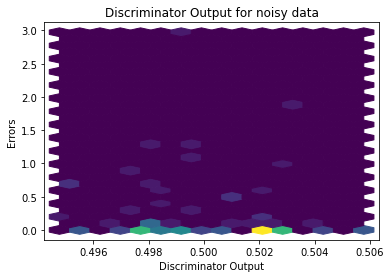

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0744]], requires_grad=True)
